# Premier aperçu du dataset

In [1]:
import seaborn as sns

df = sns.load_dataset("iris")

## Description du dataset

In [2]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [3]:
df.sample(3)

sepal_length  sepal_width  petal_length  petal_width     species
135           7.7          3.0           6.1          2.3   virginica
128           6.4          2.8           5.6          2.1   virginica
56            6.3          3.3           4.7          1.6  versicolor

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Visualisation d'exploration

### Variables numériques

In [10]:
num_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

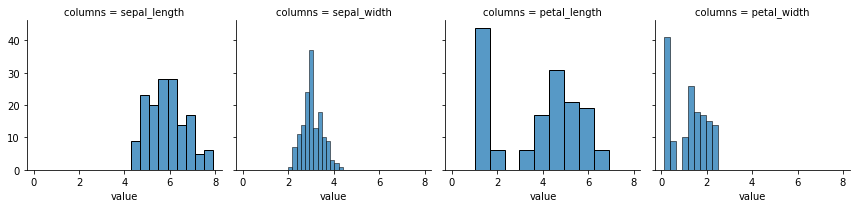

In [11]:
dfm = df[num_columns].melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.histplot, 'value'))

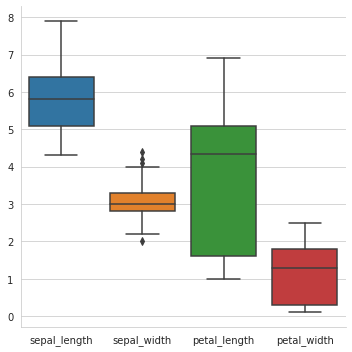

In [62]:
sns.catplot(data = df[num_columns], kind='box');

### Variables categorielles

In [17]:
cat_columns = ['species']

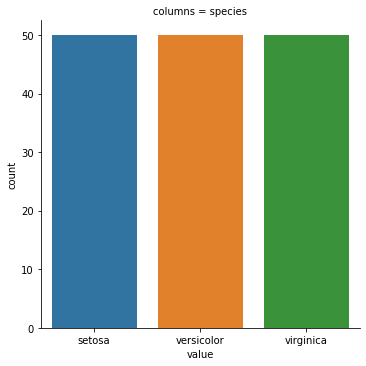

In [40]:
dfm = df[cat_columns].melt(var_name='columns')
sns.catplot(x = 'value', data = dfm, col = 'columns', kind='count');

### Relations

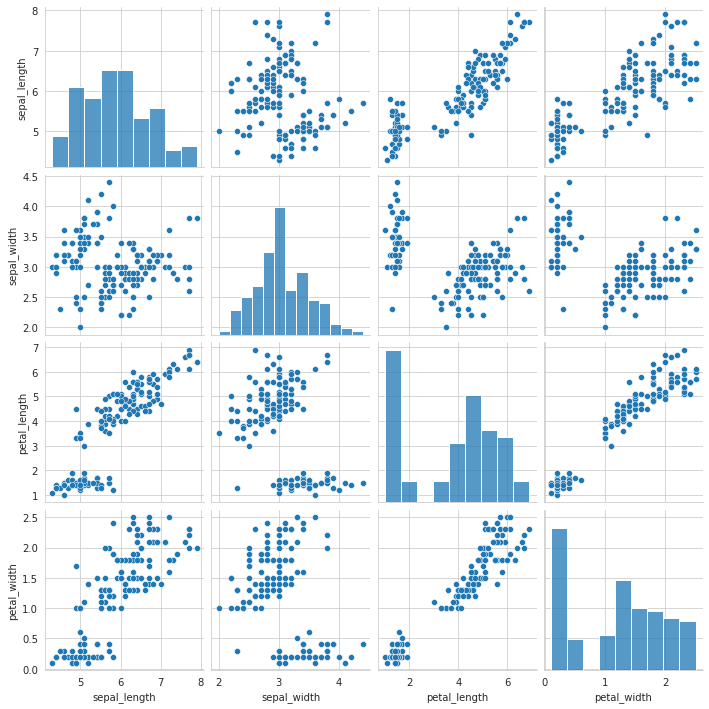

In [49]:
sns.pairplot(df);

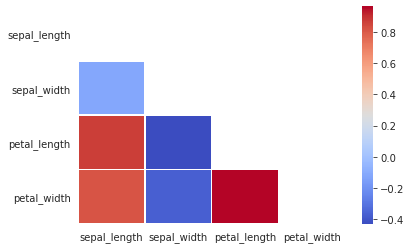

In [55]:
sns.heatmap(df.corr(), cmap= 'coolwarm', mask=np.triu(df.corr()), linewidths=0.5);

# Valeurs manquantes

https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

In [71]:
df = pd.read_csv('melb_data.csv')
df.shape

(13580, 21)

In [72]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [73]:
num_col = df.select_dtypes(exclude=['object']).columns
num_col

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [74]:
# df.CouncilArea.value_counts()

In [75]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [76]:
num_cols_with_missing = [col for col in num_col if df[col].isnull().any()]
num_cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [77]:
# pourcentage de valeurs nulles par colonne
df[cols_with_missing].isnull().sum() / df.shape[0] * 100

Car              0.456554
BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
dtype: float64

## Suppression des lignes qui possèdent des valeurs manquantes

In [78]:
df2 = df.dropna()

In [79]:
df2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [80]:
df2.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [81]:
df2.shape

(6196, 21)

## Suppression des colonnes qui possèdent des valeurs manquantes

In [82]:
df2 = df.drop(cols_with_missing, axis=1)

In [83]:
df2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [84]:
df2.shape

(13580, 17)

> Todo : combien de valeurs ont été suprimées dans chacun des cas précédents?

## Remplir les valeurs manquantes

In [85]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()

# pour simplifier, on ne garde que les colonnes numériques
df3 = df[num_cols_with_missing]

df3 = pd.DataFrame(my_imputer.fit_transform(df3))

df3.columns = df[num_cols_with_missing].columns
df3.head()

Car  BuildingArea    YearBuilt
0  1.0     151.96765  1964.684217
1  0.0      79.00000  1900.000000
2  0.0     150.00000  1900.000000
3  1.0     151.96765  1964.684217
4  2.0     142.00000  2014.000000

In [86]:
df2 = df.drop('CouncilArea', axis = 1)

In [87]:
df2[num_cols_with_missing] = df3

In [88]:
df2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [89]:
df2.shape

(13580, 20)

> Todo : même question

# Variables catégorielles
https://fr.wikipedia.org/wiki/Variable_cat%C3%A9gorielle

In [92]:
df = pd.read_csv('melb_data.csv')

In [96]:
object_cols = df.select_dtypes('object').columns

In [104]:
for col in object_cols :
    print(col, len(df[col].unique()))

Suburb 314
Address 13378
Type 3
Method 5
SellerG 268
Date 58
CouncilArea 34
Regionname 8


In [105]:
low_cardinality_cols = [col for col in df.columns if df[col].nunique() < 10 and 
                        df[col].dtype == "object"]
low_cardinality_cols

['Type', 'Method', 'Regionname']

## Option 1 : on les supprime...

In [93]:
df2 = df.select_dtypes(exclude=['object'])

## Option2 : on les encode par des entiers

![](cat1.png)

In [106]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2 = df.copy()

for col in low_cardinality_cols:
    df2[col] = label_encoder.fit_transform(df[col])

df2.head()

Suburb           Address  Rooms  Type      Price  Method SellerG  \
0  Abbotsford      85 Turner St      2     0  1480000.0       1  Biggin   
1  Abbotsford   25 Bloomburg St      2     0  1035000.0       1  Biggin   
2  Abbotsford      5 Charles St      3     0  1465000.0       3  Biggin   
3  Abbotsford  40 Federation La      3     0   850000.0       0  Biggin   
4  Abbotsford       55a Park St      4     0  1600000.0       4  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude  Regionname  Propertycount  
0        NaN        Yarra  -37.7996    144.9984           2         4019.0  
1     1900.0        Yarra  -37.8079    144.9934           2         4019.0  
2     1900.0        Yarra  -37.8093    144.9944           2         4019.0  
3        NaN        Yarra  -37.7969    144.9969           2         4019.0  
4     2014.0        Yarra  -37.8072    144.9941           2         4019.0  

[5 rows x 21 columns]

## Option3 : one-hot encoding

![](cat2.png)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [107]:
pd.get_dummies(df[low_cardinality_cols])

Type_h  Type_t  Type_u  Method_PI  Method_S  Method_SA  Method_SP  \
0           1       0       0          0         1          0          0   
1           1       0       0          0         1          0          0   
2           1       0       0          0         0          0          1   
3           1       0       0          1         0          0          0   
4           1       0       0          0         0          0          0   
...       ...     ...     ...        ...       ...        ...        ...   
13575       1       0       0          0         1          0          0   
13576       1       0       0          0         0          0          1   
13577       1       0       0          0         1          0          0   
13578       1       0       0          1         0          0          0   
13579       1       0       0          0         0          0          1   

       Method_VB  Regionname_Eastern Metropolitan  \
0              0                                0   
1              0                                0   
2              0                                0   
3              0                                0   
4              1                                0   
...          ...                              ...   
13575          0                                0   
13576          0                                0   
13577          0                                0   
13578          0                                0   
13579          0                                0   

       Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                                0                                 1   
1                                0                                 1   
2                                0                                 1   
3                                0                                 1   
4                                0                                 1   
...                            ...                               ...   
13575                            0                                 0   
13576                            0                                 0   
13577                            0                                 0   
13578                            0                                 0   
13579                            0                                 0   

       Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   
...                             ...                                    ...   
13575                             0                                      1   
13576                             0                                      0   
13577                             0                                      0   
13578                             0                                      0   
13579                             0                                      0   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
13575                                 0                                0   
13576                                 0        

In [109]:
df2 = df.drop(low_cardinality_cols, axis = 1)

In [110]:
df2.join(pd.get_dummies(df[low_cardinality_cols]))

Suburb           Address  Rooms      Price   SellerG  \
0         Abbotsford      85 Turner St      2  1480000.0    Biggin   
1         Abbotsford   25 Bloomburg St      2  1035000.0    Biggin   
2         Abbotsford      5 Charles St      3  1465000.0    Biggin   
3         Abbotsford  40 Federation La      3   850000.0    Biggin   
4         Abbotsford       55a Park St      4  1600000.0    Nelson   
...              ...               ...    ...        ...       ...   
13575  Wheelers Hill      12 Strada Cr      4  1245000.0     Barry   
13576   Williamstown     77 Merrett Dr      3  1031000.0  Williams   
13577   Williamstown       83 Power St      3  1170000.0     Raine   
13578   Williamstown      96 Verdon St      4  2500000.0   Sweeney   
13579     Yarraville        6 Agnes St      4  1285000.0   Village   

             Date  Distance  Postcode  Bedroom2  Bathroom  ...  Method_SP  \
0       3/12/2016       2.5    3067.0       2.0       1.0  ...          0   
1       4/02/2016       2.5    3067.0       2.0       1.0  ...          0   
2       4/03/2017       2.5    3067.0       3.0       2.0  ...          1   
3       4/03/2017       2.5    3067.0       3.0       2.0  ...          0   
4       4/06/2016       2.5    3067.0       3.0       1.0  ...          0   
...           ...       ...       ...       ...       ...  ...        ...   
13575  26/08/2017      16.7    3150.0       4.0       2.0  ...          0   
13576  26/08/2017       6.8    3016.0       3.0       2.0  ...          1   
13577  26/08/2017       6.8    3016.0       3.0       2.0  ...          0   
13578  26/08/2017       6.8    3016.0       4.0       1.0  ...          0   
13579  26/08/2017       6.3    3013.0       4.0       1.0  ...          1   

       Method_VB  Regionname_Eastern Metropolitan  \
0              0                                0   
1              0                                0   
2              0                                0   
3              0                                0   
4              1                                0   
...          ...                              ...   
13575          0                                0   
13576          0                                0   
13577          0                                0   
13578          0                                0   
13579          0                                0   

       Regionname_Eastern Victoria Regionname_Northern Metropolitan  \
0                                0                                1   
1                                0                                1   
2                                0                                1   
3                                0                                1   
4                                0                                1   
...                            ...                              ...   
13575                            0                                0   
13576                            0                                0   
13577                            0                                0   
13578                            0                                0   
13579                            0                                0   

       Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   
...                             ...                                    ...   
13575                             0                                      1   
13576                             0                                      0   
13577                             0                     

# Regex

In [14]:
df = pd.read_csv('BL-Flickr-Images-Book.csv')
df.set_index('Identifier', inplace=True)

In [15]:
df.head(5)

Edition Statement      Place of Publication  \
Identifier                                                           
206                                  NaN                    London   
216                                  NaN  London; Virtue & Yorston   
218                                  NaN                    London   
472                                  NaN                    London   
480         A new edition, revised, etc.                    London   

           Date of Publication              Publisher  \
Identifier                                              
206                1879 [1878]       S. Tinsley & Co.   
216                       1868           Virtue & Co.   
218                       1869  Bradbury, Evans & Co.   
472                       1851          James Darling   
480                       1857   Wertheim & Macintosh   

                                                        Title     Author  \
Identifier                                                                 
206                         Walter Forbes. [A novel.] By A. A      A. A.   
216         All for Greed. [A novel. The dedication signed...  A., A. A.   
218         Love the Avenger. By the author of “All for Gr...  A., A. A.   
472         Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
480         [The World in which I live, and my place in it...  A., E. S.   

                                            Contributors  Corporate Author  \
Identifier                                                                   
206                                      FORBES, Walter.               NaN   
216         BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
218         BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
472                          Appleyard, Ernest Silvanus.               NaN   
480                                  BROOME, John Henry.               NaN   

            Corporate Contributors Former owner  Engraver Issuance type  \
Identifier                                                                
206                            NaN          NaN       NaN   monographic   
216                            NaN          NaN       NaN   monographic   
218                            NaN          NaN       NaN   monographic   
472                            NaN          NaN       NaN   monographic   
480                            NaN          NaN       NaN   monographic   

                                                   Flickr URL  \
Identifier                                                      
206         http://www.flickr.com/photos/britishlibrary/ta...   
216         http://www.flickr.com/photos/britishlibrary/ta...   
218         http://www.flickr.com/photos/britishlibrary/ta...   
472         http://www.flickr.com/photos/britishlibrary/ta...   
480         http://www.flickr.com/photos/britishlibrary/ta...   

                                     Shelfmarks  
Identifier                                       
206           British Library HMNTS 12641.b.30.  
216           British Library HMNTS 12626.cc.2.  
218           British Library HMNTS 12625.dd.1.  
472         British Library HMNTS 10369.bbb.15.  
480            British Library HMNTS 9007.d.28.

In [16]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

Un livre particulier ne peut avoir qu'une seule date de publication. Par conséquent, nous devons procéder comme suit :

- Supprimer les dates supplémentaires entre crochets, lorsqu'elles sont présentes : 1879 [1878]
- Convertir les plages de dates à leur "date de début", lorsqu'elles sont présentes : 1860-63 ; 1839, 38-54
- Supprimez complètement les dates dont nous ne sommes pas certains et remplacez-les par le NaN de NumPy : [1897 ?].
- Convertissez la chaîne nan en valeur NaN de NumPy.

En synthétisant ces motifs, nous pouvons en fait tirer parti d'une seule expression régulière pour extraire l'année de publication :

In [17]:
regex = r'^(\d{4})'

L'expression régulière ci-dessus est censée trouver n'importe quels quatre chiffres au début d'une chaîne, ce qui suffit dans notre cas. L'expression ci-dessus est une chaîne brute (ce qui signifie que la barre oblique inversée n'est plus un caractère d'échappement), ce qui est une pratique standard avec les expressions régulières.

Le caractère \d représente n'importe quel chiffre, et {4} répète cette règle quatre fois. Le caractère ^ correspond au début d'une chaîne, et les parenthèses indiquent un groupe de capture, ce qui signale à Pandas que nous voulons extraire cette partie de la regex. (Nous voulons ^ pour éviter les cas où [ commence la chaîne).

Voyons ce qui se passe lorsque nous exécutons cette regex sur notre ensemble de données :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

In [21]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

> Vous pouvez inspecter l'expression ci-dessus sur [regex101.com](https://regex101.com/r/3AJ1Pv/1) et tout apprendre sur les expressions régulières avec [Regular Expressions : Regex en Python](https://realpython.com/regex-python/)

In [22]:
df['Date of Publication'] = pd.to_numeric(extr)

In [23]:
df['Date of Publication'].isnull().sum() / len(df)

0.11717147339205986

Great job!